In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:

df = pd.read_csv("/content/sample_data/HW4Data.csv")

In [ ]:
df.head()

,Days,Corn_NDVI_2013,Cotton_NDVI_2013,Soybean_NDVI_2013,Corn_NDVI_2014,Cotton_NDVI_2014,Soybean_NDVI_2014,Corn_MSAVI_2013,Cotton_MSAVI_2013,Soybean_MSAVI_2013,Corn_MSAVI_2014,Cotton_MSAVI_2014,Soybean_MSAVI_2014
0,116,0.621638,0.182465,0.710824,0.548149,0.200251,0.665377,0.763500,0.307711,0.820558,0.702741,0.330965,0.763316
1,117,0.639923,0.183393,0.690518,0.554911,0.201925,0.634771,0.776259,0.308948,0.804358,0.707755,0.332663,0.734997
2,118,0.658207,0.184321,0.670212,0.561673,0.203599,0.604165,0.789019,0.310186,0.788159,0.712769,0.334361,0.706678
3,119,0.676491,0.185248,0.649907,0.568434,0.205272,0.573559,0.801779,0.311423,0.771959,0.717782,0.336059,0.678359
4,120,0.694776,0.186176,0.629601,0.575196,0.206946,0.542953,0.814539,0.312660,0.755760,0.722796,0.337757,0.650040


In [ ]:
days= df["Days"]

ndvi_corn13 = df["Corn_NDVI_2013"]
ndvi_cotton13 = df["Cotton_NDVI_2013"]

msavi_corn13 = df["Corn_MSAVI_2013"]
msavi_cotton13 = df["Cotton_MSAVI_2013"]


ndvi_corn14 = df["Corn_NDVI_2014"]
ndvi_cotton14 = df["Cotton_NDVI_2014"]

msavi_corn14 = df["Corn_MSAVI_2014"]
msavi_cotton14 = df["Cotton_MSAVI_2014"]


# Q1

### corn and cotton NDVI vs days : Solution using SKLearn (with Polynomial regression)

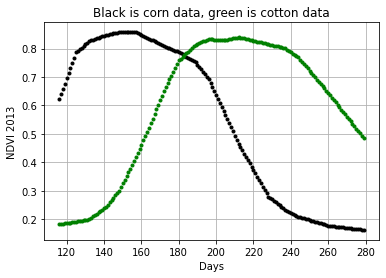

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# fig = plt.figure(figsize=(8,4))
plt.plot(days, ndvi_corn13, "k.")
plt.plot(days, ndvi_cotton13, "g.")
plt.title("Black is corn data, green is cotton data")
plt.grid()

plt.xlabel("Days")
plt.ylabel("NDVI 2013");



Polynomial regression for this data 

In [ ]:

# use train-test-split to divide combined data set into train and test set
from sklearn.model_selection import train_test_split

x_train_corn, x_test_corn, y_train_corn, y_test_corn = train_test_split(days, ndvi_corn13, test_size=0.2, random_state=123)

print("x_train_corn.shape = ", x_train_corn.shape)
print("x_test_corn.shape = ", x_test_corn.shape)
print()
print("y_train_corn.shape = ", y_train_corn.shape)
print("y_test_corn.shape = ", y_test_corn.shape)

x_train_cotton, x_test_cotton, y_train_cotton, y_test_cotton = train_test_split(days, ndvi_cotton13, test_size=0.2, random_state=123)

print("x_train_cotton.shape = ", x_train_cotton.shape)
print("x_test_cotton.shape = ", x_test_cotton.shape)
print()
print("y_train_cotton.shape = ", y_train_cotton.shape)
print("y_test_cotton.shape = ", y_test_cotton.shape)

x_train_corn.shape =  (131,)
x_test_corn.shape =  (33,)

y_train_corn.shape =  (131,)
y_test_corn.shape =  (33,)
x_train_cotton.shape =  (131,)
x_test_cotton.shape =  (33,)

y_train_cotton.shape =  (131,)
y_test_cotton.shape =  (33,)


In [ ]:
# find best order for polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math 

m_range = range(1, 15)

# Testing and Testing errors
training_errors_corn=[]
testing_errors_corn=[]

best_m_corn = 0

minError_corn = math.inf

for m in m_range:
    poly = PolynomialFeatures(degree=m)
    
    # note that in fit_transform part fit does nothing and transform does the generatoion of polynomial features
    x_train_mapped_corn = poly.fit_transform(x_train_corn[:,np.newaxis])
    x_test_mapped_corn = poly.fit_transform(x_test_corn[:,np.newaxis])
    
    regressor = LinearRegression()
    regressor.fit(x_train_mapped_corn, y_train_corn)   # linear regression is on training data (no training on test data)

    # Predicting values using our trained model
    y_train_hat_corn = regressor.predict(x_train_mapped_corn)
    y_test_hat_corn = regressor.predict(x_test_mapped_corn)
    
    train_error_corn = mean_squared_error(y_train_corn, y_train_hat_corn)
    test_error_corn = mean_squared_error(y_test_corn, y_test_hat_corn)

    training_errors_corn.append(train_error_corn)
    testing_errors_corn.append(test_error_corn)
    
    errorDecreaseTolerance = 0.99  # Set as 1 for no tolerance. lower values lead to lower m (more bias less variance)

    if test_error_corn < minError_corn * errorDecreaseTolerance:
        minError_corn = test_error_corn;
        best_m_corn = m; 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

In [ ]:

m_range = range(1, 15)

# Testing and Testing errors
training_errors_cotton=[]
testing_errors_cotton=[]

best_m_cotton = 0

minError_cotton = math.inf

for mc in m_range:
    poly = PolynomialFeatures(degree=mc)
    # cotton
    x_train_mapped_cotton = poly.fit_transform(x_train_cotton[:,np.newaxis])
    x_test_mapped_cotton = poly.fit_transform(x_test_cotton[:,np.newaxis])
    
    regressor = LinearRegression()
    regressor.fit(x_train_mapped_cotton, y_train_cotton)   # linear regression is on training data (no traning on test data)

    # Predicting values using our trained model
    y_train_hat_cotton = regressor.predict(x_train_mapped_cotton)
    y_test_hat_cotton = regressor.predict(x_test_mapped_cotton)
    
    train_error_cotton = mean_squared_error(y_train_cotton, y_train_hat_cotton)
    test_error_cotton = mean_squared_error(y_test_cotton, y_test_hat_cotton)

    training_errors_cotton.append(train_error_cotton)
    testing_errors_cotton.append(test_error_cotton)
    
    errorDecreaseTolerance = 0.99  # Set as 1 for no tolerance. lower values lead to lower m (more bias less variance)
    if test_error_cotton < minError_cotton * errorDecreaseTolerance:
        minError_cotton = test_error_cotton;
        best_m_cotton = mc;   



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a nu

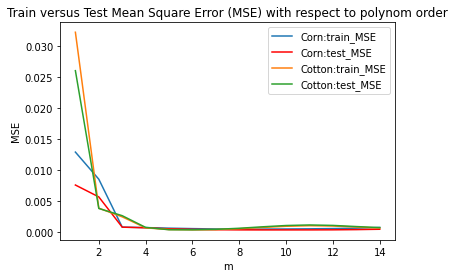

Corn :Best m is  9
Cotton :Best m is  6
Corn : MSE for m_th order polynomial regression on test data is  0.0002998988016094781
Cotton : MSE for m_th order polynomial regression on test data is  0.0003151496200685332


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(m_range, training_errors_corn, label = "Corn:train_MSE")
plt.plot(m_range, testing_errors_corn,color="red", label = "Corn:test_MSE")
plt.plot(m_range, training_errors_cotton, label = "Cotton:train_MSE")
plt.plot(m_range, testing_errors_cotton, label = "Cotton:test_MSE")

plt.xlabel("m")
plt.ylabel("MSE")
plt.title("Train versus Test Mean Square Error (MSE) with respect to polynom order")
plt.legend()
plt.show()

print("Corn :Best m is ", best_m_corn)  
print("Cotton :Best m is ", best_m_cotton)  
print("Corn : MSE for m_th order polynomial regression on test data is ", minError_corn)  
print("Cotton : MSE for m_th order polynomial regression on test data is ", minError_cotton)  

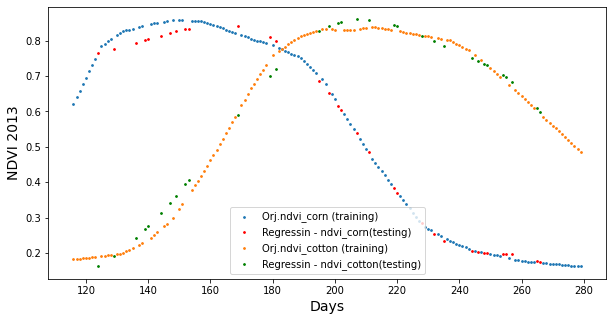

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(x_train_corn, y_train_corn, s = 3, label = "Orj.ndvi_corn (training)")
plt.scatter(x_test_corn, y_test_hat_corn, s = 3, color='red',label = "Regressin - ndvi_corn(testing)")


plt.scatter(x_train_cotton, y_train_cotton, s = 3, label="Orj.ndvi_cotton (training)")
plt.scatter(x_test_cotton, y_test_hat_cotton, s = 3, color='green',label="Regressin - ndvi_cotton(testing)")

plt.legend(loc="best")

plt.xlabel('Days', fontsize=14)
plt.ylabel('NDVI 2013', fontsize=14)
plt.show()

### corn and cotton NDVI vs days : Manuel Solution (with Polynomial regression)

In [ ]:
x1 = x_test_corn
x2 = x_test_corn**2
x3 = x_test_corn**3
x4 = x_test_corn**4
x5 = x_test_corn**5
x6 = x_test_corn**6
x7 = x_test_corn**7
x8 = x_test_corn**8
x9 = x_test_corn**9

X = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9))
X_b_corn = np.c_[np.ones((x_test_corn.size, 1)), X]
w_estimate_corn = np.linalg.inv(X_b_corn.T.dot(X_b_corn)).dot(X_b_corn.T).dot(y_test_corn)
print('[beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9] = ', w_estimate_corn)



X = np.column_stack((x1,x2,x3,x4,x5,x6))
X_b_cotton = np.c_[np.ones((x_test_cotton.size, 1)), X]
w_estimate_cotton = np.linalg.inv(X_b_cotton.T.dot(X_b_cotton)).dot(X_b_cotton.T).dot(y_test_cotton)
print('[beta0, beta1, beta2, beta3, beta4, beta5, beta6] = ', w_estimate_cotton)

[beta0, beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9] =  [-1.56314706e+02  5.01278762e+00 -6.43943550e-02  4.15846462e-04
 -1.32321559e-06  1.29478184e-09  2.81284221e-12 -5.76717290e-15
 -1.37199035e-21  1.32738220e-22]
[beta0, beta1, beta2, beta3, beta4, beta5, beta6] =  [ 1.92384484e+01 -1.37073499e-01 -4.61528161e-03  7.54856630e-05
 -4.46497490e-07  1.19323838e-09 -1.21402493e-12]


In [ ]:
w_estimate_corn

array([-1.56314706e+02,  5.01278762e+00, -6.43943550e-02,  4.15846462e-04,
       -1.32321559e-06,  1.29478184e-09,  2.81284221e-12, -5.76717290e-15,
       -1.37199035e-21,  1.32738220e-22])

In [ ]:
y_hat_corn = X_b_corn.dot(w_estimate_corn)
y_hat_corn

array([0.19263708, 0.54005222, 0.60212631, 0.19150347, 0.84279342,
       0.67699529, 0.82536938, 0.16908997, 0.78293437, 0.3753304 ,
       0.79263208, 0.17511746, 0.20379824, 0.61288751, 0.48923736,
       0.84322872, 0.24909245, 0.19551588, 0.19823175, 0.84307947,
       0.386207  , 0.75438023, 0.64688846, 0.28404228, 0.83742491,
       0.19291087, 0.83095269, 0.24496254, 0.79905689, 0.84219709,
       0.83897797, 0.19634292, 0.84327475])

In [ ]:
y_hat_cotton = X_b_cotton.dot(w_estimate_cotton)
y_hat_cotton

array([0.68192834, 0.8481804 , 0.8441645 , 0.70337091, 0.32836481,
       0.82555096, 0.60271483, 0.58434646, 0.73533267, 0.83194878,
       0.71649836, 0.5984695 , 0.75436422, 0.84248437, 0.84672104,
       0.36815727, 0.78768704, 0.73180032, 0.74585025, 0.26842644,
       0.83420709, 0.2060241 , 0.83553142, 0.8102352 , 0.22067544,
       0.69666221, 0.2000696 , 0.79766094, 0.18349425, 0.30324658,
       0.22900217, 0.736682  , 0.38184527])

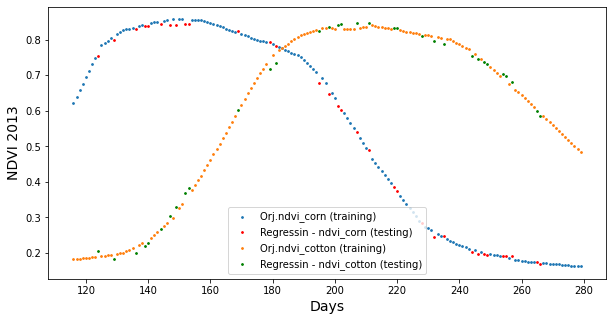

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(x_train_corn, y_train_corn, s = 3, label = "Orj.ndvi_corn (training)")
plt.scatter(x_test_corn, y_hat_corn, s = 3, color='red',label = "Regressin - ndvi_corn (testing)")


plt.scatter(x_train_cotton, y_train_cotton, s = 3, label="Orj.ndvi_cotton (training)")
plt.scatter(x_test_cotton, y_hat_cotton, s = 3, color='green',label="Regressin - ndvi_cotton (testing)")

plt.legend(loc="best")

plt.xlabel('Days', fontsize=14)
plt.ylabel('NDVI 2013', fontsize=14)
plt.show()

Our manual prediction curve  and SKLearn's prediction curve is almost the same

In [ ]:
err_skl_corn=mean_squared_error(y_test_corn, y_test_hat_corn) 
err_mnl_corn=mean_squared_error(y_test_corn, y_hat_corn) 

print(err_skl_corn)
print(err_mnl_corn)

print()

err_skl_cotton=mean_squared_error(y_test_cotton, y_test_hat_cotton) 
err_mnl_cotton=mean_squared_error(y_test_cotton, y_hat_cotton) 

print(err_skl_cotton)
print(err_mnl_cotton)

0.0004076453606286211
8.720680159117136e-05

0.0006728504706178298
0.0001717507871476183


With manual solution, MSE is closer to zero, so our model performed better with manual solution.

# Q2

### Ridge

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ridge Regression function
def ridgeRegression(X, y, alpha, biasRegularization, normalizeData): 
    if (normalizeData):
        X = StandardScaler().fit_transform(X)

    n = len(X)

    # add ones to the left of x
    Xn = np.c_[np.ones((n,1)), X]

    p = len(Xn[0])
    
    D = np.identity(p)
    if (biasRegularization == False):
        D[0,0] = 0.0        

    # solve for w    
    Xa = (1/n)*(Xn.T.dot(Xn));
    Xb = (1/n)*(Xn.T.dot(y));    
    w = np.linalg.inv(Xa + (alpha/p)*D).dot(Xb)

    return w  


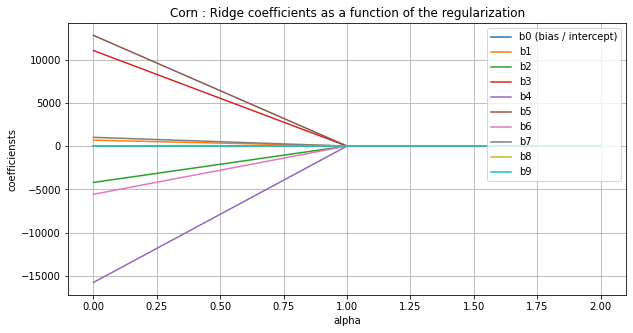

In [ ]:
%matplotlib inline

ridge_alphas = np.hstack((np.linspace(0, 1, 2), np.linspace(1, 2)))

# create ridge paths 
biasRegularization = False
normalizeData = True

ridge_coefficients_corn = []
ridge_coefficients_cotton = []

cl=x_train_corn
x1 = cl
x2 = cl**2
x3 = cl**3
x4 = cl**4
x5 = cl**5
x6 = cl**6
x7 = cl**7
x8 = cl**8
x9 = cl**9

cll=x_train_cotton
x11 = cll
x22 = cll**2
x33 = cll**3
x44 = cll**4
x55 = cll**5
x66 = cll**6

X_corn = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9))
X_b_corn = np.c_[np.ones((y_train_corn.size, 1)), X_corn]

X_cotton = np.column_stack((x11,x22,x33,x44,x55,x66))
X_b_cotton = np.c_[np.ones((y_train_cotton.size, 1)), X_cotton]

for alpha in ridge_alphas:
    w_corn = ridgeRegression(X_corn, y_train_corn, alpha, biasRegularization, normalizeData)
    ridge_coefficients_corn.append(w_corn)

    w_cotton = ridgeRegression(X_cotton, y_train_cotton, alpha, biasRegularization, normalizeData)
    ridge_coefficients_cotton.append(w_cotton)
    #print(w)


# show ridge paths

plt.figure(figsize=(10, 5))

plt.plot(ridge_alphas, ridge_coefficients_corn)


plt.xlabel('alpha')

#coefficients
plt.ylabel('coefficiensts')
plt.title('Corn : Ridge coefficients as a function of the regularization')
plt.legend(('b0 (bias / intercept)', 'b1', 'b2', 'b3', 'b4', 'b5','b6', 'b7', 'b8', 'b9'),loc="upper right")

plt.grid()
plt.show()



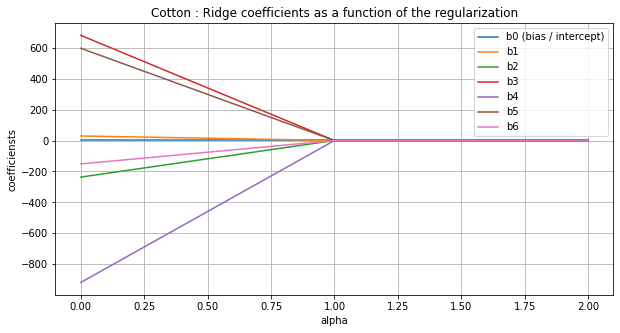

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(ridge_alphas, ridge_coefficients_cotton)


plt.xlabel('alpha')

#coefficients
plt.ylabel('coefficiensts')
plt.title('Cotton : Ridge coefficients as a function of the regularization')
plt.legend(('b0 (bias / intercept)', 'b1', 'b2', 'b3', 'b4', 'b5','b6', 'b7', 'b8', 'b9'),loc="upper right")

plt.grid()
plt.show()

A sparse solution :

We found the optimal polynomial degree 9 for the Corn data. Here, we observed that 5 of the coefficients significantly affected the solution, while the others(4)  did not.

We found the optimal polynomial degree of 6 for the Cotton data. Here, we observed that 5 of the coefficients significantly affected the solution, while the others (2) did not.

### Lasso

In [ ]:
# LASSO Regression function
def lassoRegression(X, y, alpha, biasRegularization, normalizeData, maxIteration, convergenceTolerance):
    if (normalizeData):
        X = StandardScaler().fit_transform(X)

    n = len(X)

    # add ones to the left of x
    Xn = np.c_[np.ones((n,1)), X]

    p = len(Xn[0])

    Xa = (1/n)*(Xn.T.dot(Xn));
    Xb = (1/n)*(Xn.T.dot(y));
    
    epsilon = 1e-3

    w = np.ones(p)
    w_old = np.zeros(p)
    
    while maxIteration > 0:
        L = np.diag((np.abs(w) + epsilon)**(-1.0))
        if (biasRegularization == False):
            L[0,0] = 0.0        

        # solve for w    
        w = np.linalg.inv(Xa + (alpha/p)*L).dot(Xb)

        # check for convergence
        if (np.linalg.norm((w - w_old), ord=1) < convergenceTolerance):
            break;

        w_old = w
        
        maxIteration -= 1
        
    return w

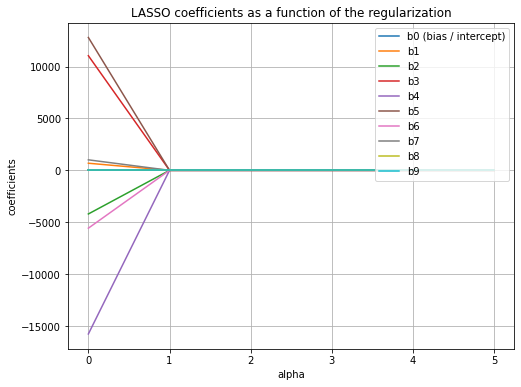

In [ ]:
lasso_alphas = np.hstack((np.linspace(0, 1, 2), np.linspace(1, 5)))

# create LASSO paths 
biasRegularization = False
normalizeData = True
maxIteration = 1000
convergenceTolerance = 1e-3

cl=x_train_corn
x1 = cl
x2 = cl**2
x3 = cl**3
x4 = cl**4
x5 = cl**5
x6 = cl**6
x7 = cl**7
x8 = cl**8
x9 = cl**9

cll=x_train_cotton
x11 = cll
x22 = cll**2
x33 = cll**3
x44 = cll**4
x55 = cll**5
x66 = cll**6

X_corn = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9))
X_b_corn = np.c_[np.ones((y_train_corn.size, 1)), X_corn]

X_cotton = np.column_stack((x11,x22,x33,x44,x55,x66))
X_b_cotton = np.c_[np.ones((y_train_cotton.size, 1)), X_cotton]

lasso_coefficients_corn = []
lasso_coefficients_cotton = []


for alpha in lasso_alphas:
    w_corn = lassoRegression(X_corn, y_train_corn, alpha, biasRegularization, normalizeData, maxIteration, convergenceTolerance)
    lasso_coefficients_corn.append(w_corn)

    w_cotton = lassoRegression(X_cotton, y_train_cotton, alpha, biasRegularization, normalizeData, maxIteration, convergenceTolerance)
    lasso_coefficients_cotton.append(w_cotton)
    #print(w)

# show LASSO paths
plt.figure(2, figsize=(8,6))
plt.plot(lasso_alphas, lasso_coefficients_corn)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('LASSO coefficients as a function of the regularization')
plt.legend(('b0 (bias / intercept)', 'b1', 'b2', 'b3', 'b4', 'b5','b6', 'b7', 'b8', 'b9'),loc="upper right")
plt.grid()
plt.show()

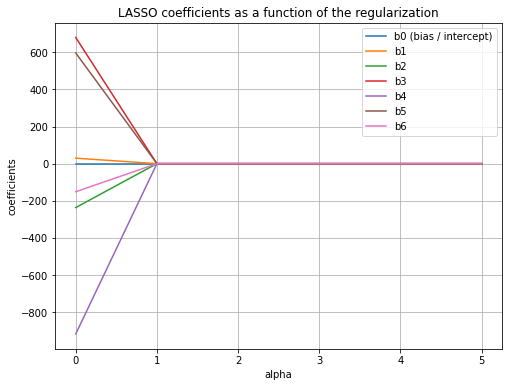

In [ ]:
plt.figure(2, figsize=(8,6))
plt.plot(lasso_alphas, lasso_coefficients_cotton)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('LASSO coefficients as a function of the regularization')
plt.legend(('b0 (bias / intercept)', 'b1', 'b2', 'b3', 'b4', 'b5','b6'),loc="upper right")
plt.grid()
plt.show()

We have obtained similar results to the results we obtained in the Ridge section.

# Q3

### MSAVI vs NDVI : Solution using SKLearn (with Polynomial regression)

In [ ]:
m_range = range(1, 15)

# Testing and Testing errors
training_errors_corn=[]
testing_errors_corn=[]

best_m_corn = 0

minError_corn = math.inf

x_train_corn, x_test_corn, y_train_corn, y_test_corn = train_test_split(ndvi_corn13, msavi_corn13, test_size=0.2, random_state=123)


for m in m_range:
    poly = PolynomialFeatures(degree=m)
    
    # note that in fit_transform part fit does nothing and transform does the generatoion of polynomial features
    x_train_mapped_corn = poly.fit_transform(x_train_corn[:,np.newaxis])
    x_test_mapped_corn = poly.fit_transform(x_test_corn[:,np.newaxis])
    
    regressor = LinearRegression()
    regressor.fit(x_train_mapped_corn, y_train_corn)   # linear regression is on training data (no training on test data)

    # Predicting values using our trained model
    y_train_hat_corn = regressor.predict(x_train_mapped_corn)
    y_test_hat_corn = regressor.predict(x_test_mapped_corn)
    
    train_error_corn = mean_squared_error(y_train_corn, y_train_hat_corn)
    test_error_corn = mean_squared_error(y_test_corn, y_test_hat_corn)

    training_errors_corn.append(train_error_corn)
    testing_errors_corn.append(test_error_corn)
    
    errorDecreaseTolerance = 0.99  # Set as 1 for no tolerance. lower values lead to lower m (more bias less variance)

    if test_error_corn < minError_corn * errorDecreaseTolerance:
        minError_corn = test_error_corn;
        best_m_corn = m; 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

In [ ]:
m_range = range(1, 15)

# Testing and Testing errors
training_errors_cotton=[]
testing_errors_cotton=[]

best_m_cotton = 0

minError_cotton = math.inf

x_train_cotton, x_test_cotton, y_train_cotton, y_test_cotton = train_test_split(ndvi_cotton13, msavi_cotton13, test_size=0.2, random_state=123)

for mc in m_range:
    poly = PolynomialFeatures(degree=mc)
    # cotton
    x_train_mapped_cotton = poly.fit_transform(x_train_cotton[:,np.newaxis])
    x_test_mapped_cotton = poly.fit_transform(x_test_cotton[:,np.newaxis])
    
    regressor = LinearRegression()
    regressor.fit(x_train_mapped_cotton, y_train_cotton)   # linear regression is on training data (no traning on test data)

    # Predicting values using our trained model
    y_train_hat_cotton = regressor.predict(x_train_mapped_cotton)
    y_test_hat_cotton = regressor.predict(x_test_mapped_cotton)
    
    train_error_cotton = mean_squared_error(y_train_cotton, y_train_hat_cotton)
    test_error_cotton = mean_squared_error(y_test_cotton, y_test_hat_cotton)

    training_errors_cotton.append(train_error_cotton)
    testing_errors_cotton.append(test_error_cotton)
    
    errorDecreaseTolerance = 0.99  # Set as 1 for no tolerance. lower values lead to lower m (more bias less variance)
    if test_error_cotton < minError_cotton * errorDecreaseTolerance:
        minError_cotton = test_error_cotton;
        best_m_cotton = mc;   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Conver

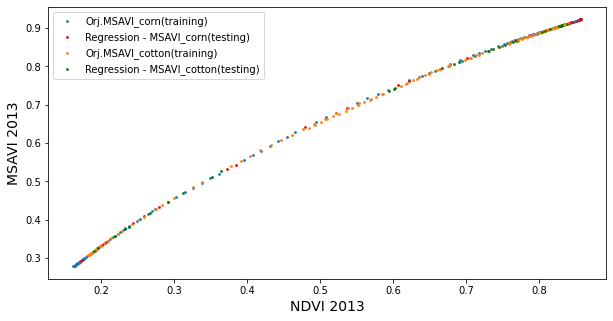

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(x_train_corn, y_train_corn, s = 3, label = "Orj.MSAVI_corn(training)")
plt.scatter(x_test_corn, y_test_hat_corn, s = 3, color='red',label = "Regression - MSAVI_corn(testing)")


plt.scatter(x_train_cotton, y_train_cotton, s = 3, label="Orj.MSAVI_cotton(training)")
plt.scatter(x_test_cotton, y_test_hat_cotton, s = 3, color='green',label="Regression - MSAVI_cotton(testing)")

plt.legend(loc="best")

plt.xlabel('NDVI 2013', fontsize=14)
plt.ylabel('MSAVI 2013', fontsize=14)
plt.show()

This relationship could also be approximately represented by a linear line.

In [ ]:
print(training_errors_corn)
print(testing_errors_corn)
print('------------')
print(training_errors_cotton)
print(testing_errors_cotton)

[0.00046088602258569084, 6.831674017602173e-06, 2.5813677561315865e-06, 1.5423136753249513e-06, 1.077495837458736e-06, 8.910028031882905e-07, 8.462894358513206e-07, 5.431464114142707e-07, 5.276977300342112e-07, 5.251188117769265e-07, 5.100901025256175e-07, 4.86515438090698e-07, 4.793823069370666e-07, 4.655567421267312e-07]
[0.00046868840837467325, 6.239194641562766e-06, 2.8997010364656486e-06, 1.7912433306341663e-06, 1.0611524925351996e-06, 1.0200455232932388e-06, 8.974579597929435e-07, 5.29723129564164e-07, 4.707413617661849e-07, 4.5684863909919243e-07, 3.879308734496201e-07, 4.544835826116132e-07, 4.5756003588322904e-07, 4.592371452087725e-07]
------------
[0.00040412561843608487, 5.1245125016393245e-06, 2.0174551316590316e-06, 8.765271197773564e-07, 8.48845991288025e-07, 7.99942392988988e-07, 7.998989842314158e-07, 6.800763732655379e-07, 6.405362324410921e-07, 6.093348776078811e-07, 5.457482674993179e-07, 5.445226952321181e-07, 5.432106155564942e-07, 5.405037776177725e-07]
[0.000256

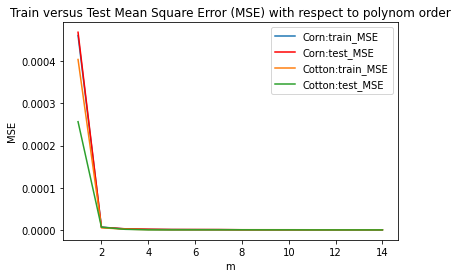

In [ ]:
%matplotlib inline

plt.plot(m_range, training_errors_corn, label = "Corn:train_MSE")
plt.plot(m_range, testing_errors_corn,color="red", label = "Corn:test_MSE")
plt.plot(m_range, training_errors_cotton, label = "Cotton:train_MSE")
plt.plot(m_range, testing_errors_cotton, label = "Cotton:test_MSE")

plt.xlabel("m")
plt.ylabel("MSE")
plt.title("Train versus Test Mean Square Error (MSE) with respect to polynom order")
plt.legend()
plt.show()



If we represented the data with a linear line, we would encounter serious errors. However, as can be seen in the graph, the 2nd degree and later errors are very close to each other and to zero.

# Q4

### NDVI 2014 vs NDVI 2013

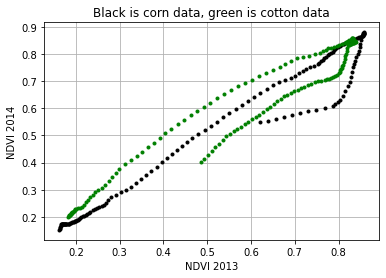

In [ ]:
x_train_corn, x_test_corn, y_train_corn, y_test_corn = train_test_split(ndvi_corn13, ndvi_corn14, test_size=0.2, random_state=123)
x_train_cotton, x_test_cotton, y_train_cotton, y_test_cotton = train_test_split(ndvi_cotton13, ndvi_cotton14, test_size=0.2, random_state=123)


# fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_corn13, ndvi_corn14, "k.")
plt.plot(ndvi_cotton13, ndvi_cotton14, "g.")
plt.title("Black is corn data, green is cotton data")
plt.grid()

plt.xlabel("NDVI 2013")
plt.ylabel("NDVI 2014");

In [ ]:
pol_ndvi = PolynomialFeatures(degree=9)


####corn
# note that in fit_transform part fit does nothing and transform does the generatoion of polynomial features
x_train_mapped_corn = pol_ndvi.fit_transform(x_train_corn[:,np.newaxis])
x_test_mapped_corn = pol_ndvi.fit_transform(x_test_corn[:,np.newaxis])
    
regressor = LinearRegression()
regressor.fit(x_train_mapped_corn, y_train_corn)   # linear regression is on training data (no training on test data)

# Predicting values using our trained model
y_train_hat_corn = regressor.predict(x_train_mapped_corn)
y_test_hat_corn = regressor.predict(x_test_mapped_corn)
    
train_error_corn = mean_squared_error(y_train_corn, y_train_hat_corn)
test_error_corn = mean_squared_error(y_test_corn, y_test_hat_corn)


#####cotton
# note that in fit_transform part fit does nothing and transform does the generatoion of polynomial features
x_train_mapped_cotton = pol_ndvi.fit_transform(x_train_cotton[:,np.newaxis])
x_test_mapped_cotton = pol_ndvi.fit_transform(x_test_cotton[:,np.newaxis])
    
regressor = LinearRegression()
regressor.fit(x_train_mapped_cotton, y_train_cotton)   # linear regression is on training data (no training on test data)

# Predicting values using our trained model
y_train_hat_cotton = regressor.predict(x_train_mapped_cotton)
y_test_hat_cotton = regressor.predict(x_test_mapped_cotton)
    
train_error_cotton = mean_squared_error(y_train_cotton, y_train_hat_cotton)
test_error_cotton = mean_squared_error(y_test_cotton, y_test_hat_cotton)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead

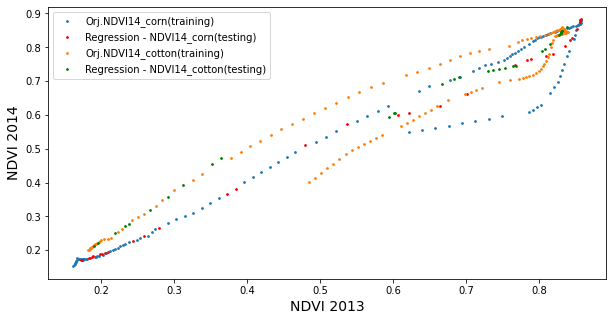

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(x_train_corn, y_train_corn, s = 3, label = "Orj.NDVI14_corn(training)")
plt.scatter(x_test_corn, y_test_hat_corn, s = 3, color='red',label = "Regression - NDVI14_corn(testing)")


plt.scatter(x_train_cotton, y_train_cotton, s = 3, label="Orj.NDVI14_cotton(training)")
plt.scatter(x_test_cotton, y_test_hat_cotton, s = 3, color='green',label="Regression - NDVI14_cotton(testing)")

plt.legend(loc="best")

plt.xlabel('NDVI 2013', fontsize=14)
plt.ylabel('NDVI 2014', fontsize=14)
plt.show()

It's not a bad representation. Our model looks fine.

In [ ]:
print(train_error_corn)
print(test_error_corn)
print('------------------------')
print(train_error_cotton)
print(test_error_cotton)

0.0022368170338786957
0.0018604089091063638
------------------------
0.0022740781126934415
0.0013792342085808009


We have succeeded in reducing errors with our model.

### MSAVI 2014 vs NDVI 2013

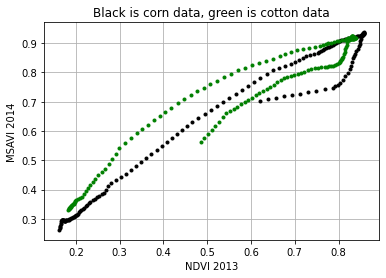

In [ ]:
x_train_corn, x_test_corn, y_train_corn, y_test_corn = train_test_split(ndvi_corn13, msavi_corn14, test_size=0.2, random_state=123)
x_train_cotton, x_test_cotton, y_train_cotton, y_test_cotton = train_test_split(ndvi_cotton13, msavi_cotton14, test_size=0.2, random_state=123)


# fig = plt.figure(figsize=(8,4))
plt.plot(ndvi_corn13, msavi_corn14, "k.")
plt.plot(ndvi_cotton13, msavi_cotton14, "g.")
plt.title("Black is corn data, green is cotton data")
plt.grid()

plt.xlabel("NDVI 2013")
plt.ylabel("MSAVI 2014");

In [ ]:
pol_msavi = PolynomialFeatures(degree=9)
training_errors_corn=[]
testing_errors_corn=[]

training_errors_cotton=[]
testing_errors_cotton=[]

####corn
# note that in fit_transform part fit does nothing and transform does the generatoion of polynomial features
x_train_mapped_corn = pol_msavi.fit_transform(x_train_corn[:,np.newaxis])
x_test_mapped_corn = pol_msavi.fit_transform(x_test_corn[:,np.newaxis])
    
regressor = LinearRegression()
regressor.fit(x_train_mapped_corn, y_train_corn)   # linear regression is on training data (no training on test data)

# Predicting values using our trained model
y_train_hat_corn = regressor.predict(x_train_mapped_corn)
y_test_hat_corn = regressor.predict(x_test_mapped_corn)
    
train_error_corn = mean_squared_error(y_train_corn, y_train_hat_corn)
test_error_corn = mean_squared_error(y_test_corn, y_test_hat_corn)


#####cotton
# note that in fit_transform part fit does nothing and transform does the generatoion of polynomial features
x_train_mapped_cotton = pol_msavi.fit_transform(x_train_cotton[:,np.newaxis])
x_test_mapped_cotton = pol_msavi.fit_transform(x_test_cotton[:,np.newaxis])
    
regressor = LinearRegression()
regressor.fit(x_train_mapped_cotton, y_train_cotton)   # linear regression is on training data (no training on test data)

# Predicting values using our trained model
y_train_hat_cotton = regressor.predict(x_train_mapped_cotton)
y_test_hat_cotton = regressor.predict(x_test_mapped_cotton)
    
train_error_cotton = mean_squared_error(y_train_cotton, y_train_hat_cotton)
test_error_cotton = mean_squared_error(y_test_cotton, y_test_hat_cotton)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is dep

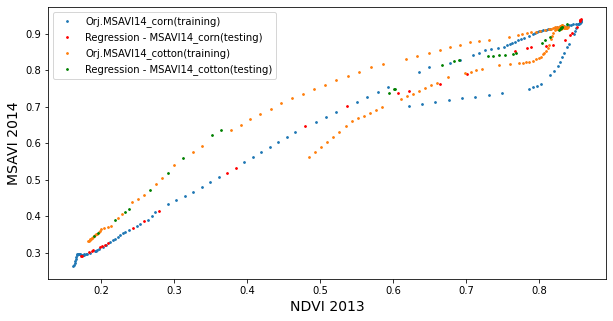

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(x_train_corn, y_train_corn, s = 3, label = "Orj.MSAVI14_corn(training)")
plt.scatter(x_test_corn, y_test_hat_corn, s = 3, color='red',label = "Regression - MSAVI14_corn(testing)")


plt.scatter(x_train_cotton, y_train_cotton, s = 3, label="Orj.MSAVI14_cotton(training)")
plt.scatter(x_test_cotton, y_test_hat_cotton, s = 3, color='green',label="Regression - MSAVI14_cotton(testing)")

plt.legend(loc="best")

plt.xlabel('NDVI 2013', fontsize=14)
plt.ylabel('MSAVI 2014', fontsize=14)
plt.show()

It's not a bad representation. Our model looks fine.

In [ ]:
print(train_error_corn)
print(test_error_corn)
print('------------------------')
print(train_error_cotton)
print(test_error_cotton)

0.0012120833297563074
0.001004618165959227
------------------------
0.0014190134224948583
0.0007325806815036321


We have succeeded in reducing errors with our model.

#Q5



*   Relevant comments were written for each step.

*   In all the work done throughout this assignment, we obtain an excellent fit to the training data  with Polynomial Curve Fitting, especially as the degree of the polynomial increases. However, the fitted curve can oscillate wildly and give a very poor representation as the degree gets too high. This may cause overfitting.

*   The presence of outliers in the data can affect the results of the nonlinear analysis. This should be carefully evaluated.

*   As the degree of the polynomial increases (up to a certain point), we can better represent our data, and with the help of Ridge and Lasso we understand which terms are more important and which are less important.

  More precisely, we can control the weight of the coefficients of the features.The decrease in the importance of the coefficients means that the effect of these features on our model decreases. Therefore, in this case, flexibility decreases.

*   For the regression problem we are working on, one of the quality metrics, MSE, was used at every stage for analyzing fitting quality. 

    Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss. The fact that MSE is almost always strictly positive (and not zero) is because of randomness or because the estimator does not account for information that could produce a more accurate estimate.

    In our example, MSE values ​​are close to zero and gradually decreasing with the model we fit.

*  First of all, we should consider that our dataset is quite limited.
Although there were no significant differences on this limited data set, our model showed more successful predictions for cotton data.

*  Although there is a relationship between crop phenogies, there are also serious differences between them.
